In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
df=pd.read_csv('pca.csv')
print(df.head())

   Feature1  Feature2  Target
0       2.5       3.1       0
1       1.2       2.3       0
2       3.4       4.2       1
3       2.1       3.0       1
4       3.0       3.5       1


Accuracy:1.0000
Confusion Matrix:
[[1 0]
 [0 1]]
classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



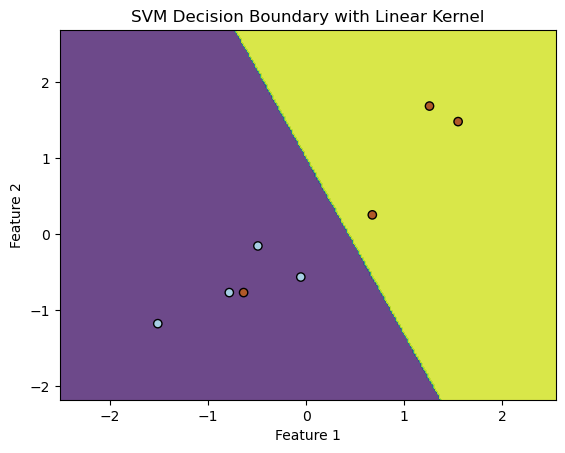

In [4]:
# Assuming the last column is the target variable (classification labels)
x=df.iloc[:,:-1]   # Select all rows and all columns except the last one for features
y=df.iloc[:,-1]    # Select the last column for the target (labels)

# Step 1: Split the dataset into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Step 2: Standardize features using StandardScaler (important for SVM)
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)  # Fit on training data and transform it
x_test=scaler.transform(x_test)       # Use the same scaler to transform test data

# Step 3: Train the Support Vector Machine (SVM) model

svm_model=SVC(kernel='linear',random_state=42)
svm_model.fit(x_train,y_train)

# Step 4: Make predictions using the trained SVM model
y_pred=svm_model.predict(x_test)

# Step 5: Evaluate the model's performance
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

# Print evaluation results

print(f'Accuracy:{accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('classification Report : ')
print(report)


# Step 6: Optional - Visualize the decision boundaries (only works for 2D features)
# This is just a visualization example for datasets with two features

if x.shape[1]==2:  # Check if we have only two features for visualization
    
    # Create a mesh grid for plotting decision boundaries
    h=.02
    x_min,x_max=x_train[:,0].min()-1,x_train[:,0].max()+1
    y_min,y_max=x_train[:,1].min()-1,x_train[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    
    # Predict over the mesh grid
    z=svm_model.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx,yy,z,alpha=0.8)
    plt.scatter(x_train[:,0],x_train[:,1],c=y_train,edgecolors='k',marker='o',cmap=plt.cm.Paired)
    plt.title('SVM Decision Boundary with Linear Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()